# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [167]:
#Import all the necessary modules
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 3000)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [85]:
pima_df = pd.read_csv("pima-indians-diabetes+(3).csv")


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [86]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [87]:
pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [88]:
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
#Replacing Pres column values with Median
median_Pres = pima_df['Pres'].median()
pima_df = pima_df.replace({'Pres':{0:median_Pres}})

#Replacing Skin column values with Median
median_Skin = pima_df['skin'].median()
pima_df = pima_df.replace({'skin':{0:median_Skin}})

#Replacing test column values with Median
median_Test = pima_df['test'].median()
pima_df = pima_df.replace({'test':{0:median_Test}})

#Replacing mass column values with Median
median_Mass = pima_df['mass'].median()
pima_df = pima_df.replace({'mass':{0:median_Mass}})

#Replacing age column values with Median
median_Age = pima_df['age'].median()
pima_df = pima_df.replace({'age':{0:median_Age}})

# Q5 Print the descriptive statistics of each & every column using describe() function

In [90]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

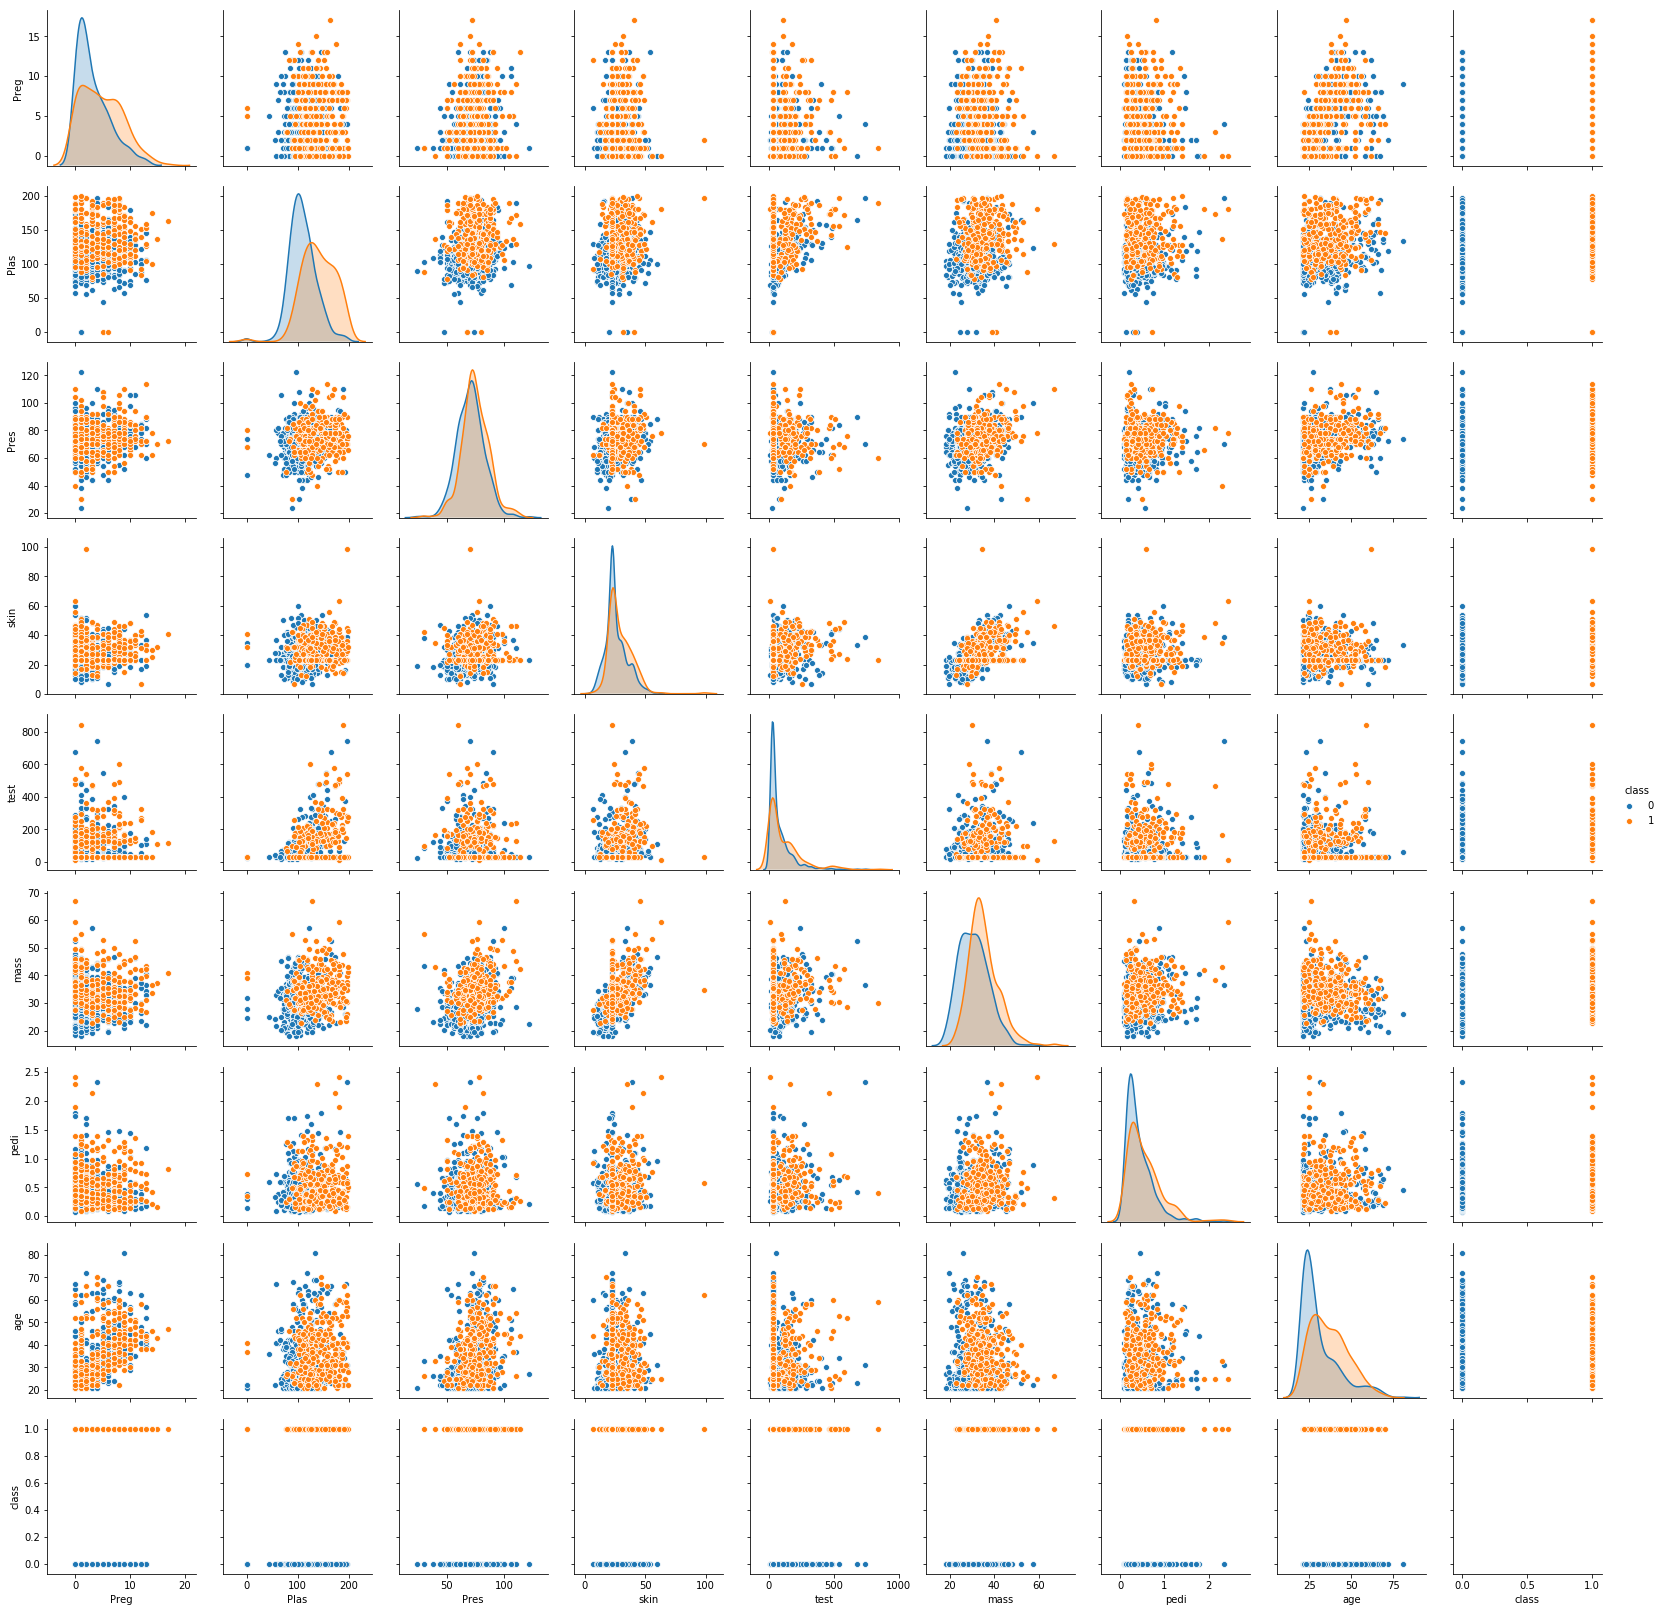

In [91]:
sns.pairplot(pima_df, hue='class')

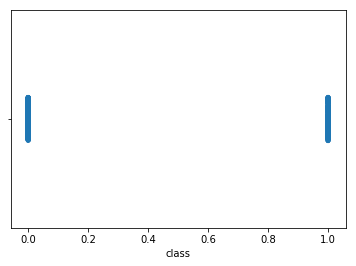

In [92]:
ax = sns.stripplot(x=pima_df["class"])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [93]:
pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.217870,0.158027,0.355252,0.218806,0.137337,0.263514,0.466581
Pres,0.208615,0.217870,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.158027,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.355252,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.218806,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137337,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


correlation between skin and mass is the highest


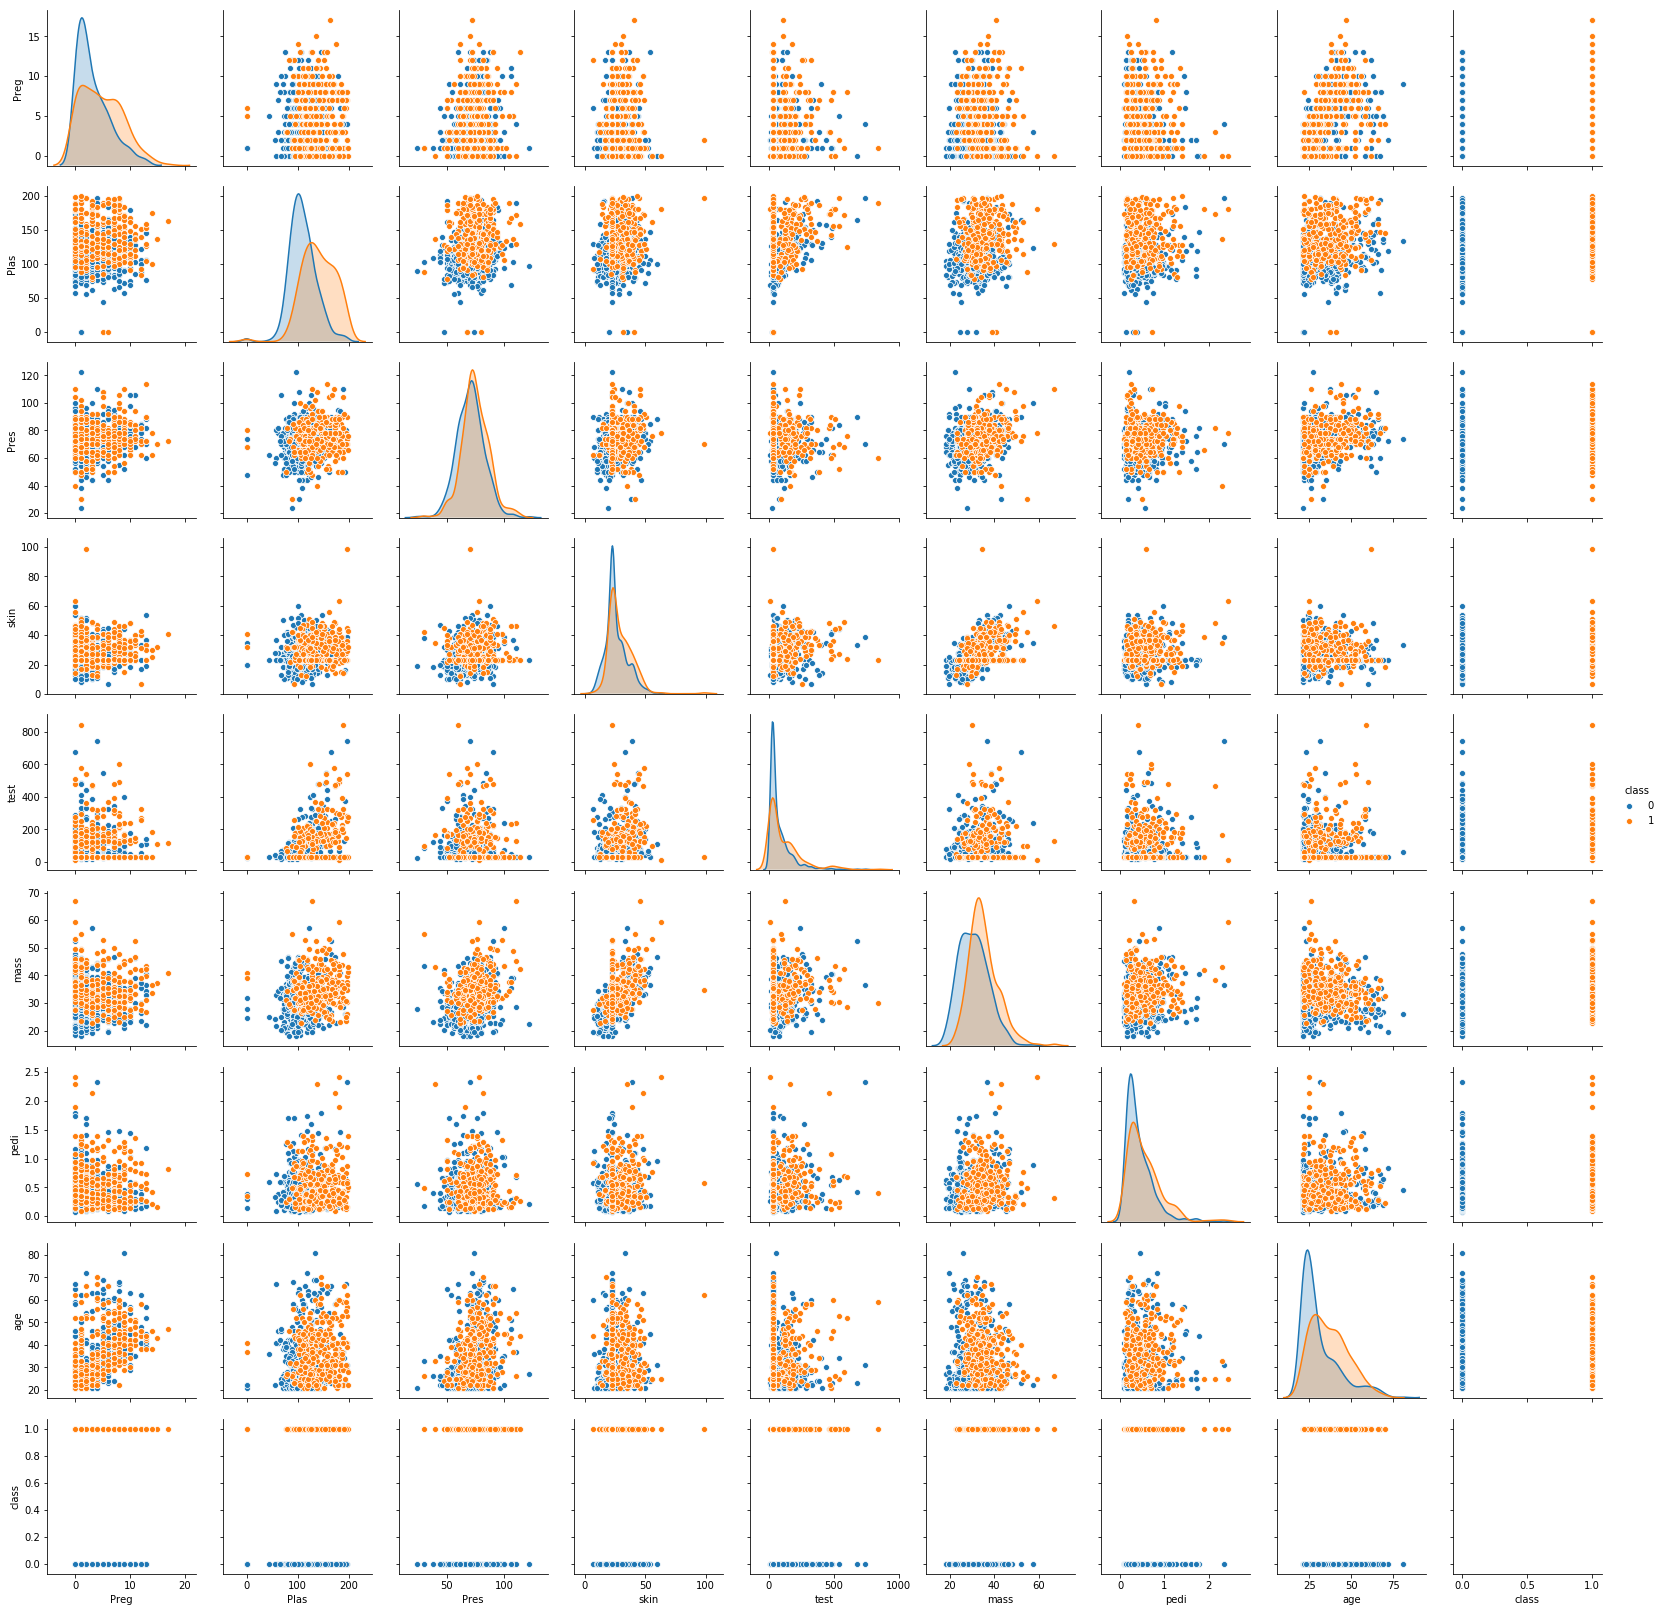

In [95]:
sns.pairplot(pima_df,hue='class')
print('correlation between skin and mass is the highest')

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [110]:
X = pima_df.drop('class',axis=1)
y = pima_df['class']

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [135]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,min_samples_leaf=10)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

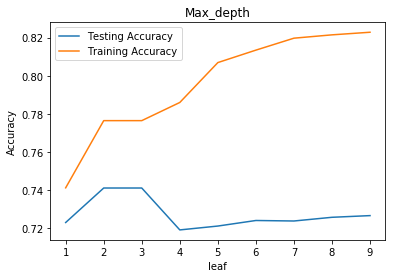

In [160]:
neighbors = np.arange(1, 10)
neighbors1 = np.arange(1, 50)

train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    train =[]
    test =[]
    for j in neighbors1:
        dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=k,min_samples_leaf=j)
        dt_model.fit(X_train,y_train)
        test_pred = dt_model.predict(X_test)
        train_acc = dt_model.score(X_train , y_train)
        test_acc = dt_model.score(X_test , y_test)
        train.append(train_acc)
        test.append(test_acc)
    train_accuracy_plot[i] = np.mean(train)
    test_accuracy_plot[i] = np.mean(test)
plt.title('Max_depth')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('leaf')
plt.ylabel('Accuracy')
plt.show()  

In [161]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,min_samples_leaf=46)
dt_model.fit(X_train,y_train)
test_pred = dt_model.predict(X_test)
train_acc = dt_model.score(X_train , y_train)
test_acc = dt_model.score(X_test , y_test)
print('training Accuracy: ',train_acc)
print('testing Accuracy: ',test_acc)

training Accuracy:  0.776536312849162
testing Accuracy:  0.7575757575757576


In [163]:
print('max_depth: ',3)
print('min_sample_leaf: ',46)

max_depth:  3
min_sample_leaf:  46


# Q10 Print the accuracy of the model & print the confusion matrix 

In [166]:
y_pred_class = dt_model.predict(X_test)

In [168]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.7575757575757576


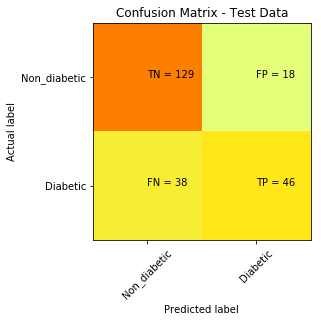

In [170]:
cm = metrics.confusion_matrix(y_test, y_pred_class)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_diabetic','Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Print the feature importance of the decision model - Optional